## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    #接在layer後面
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.25,0.5]

In [9]:
results = {}
for dout in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout=%.3f" % dout)
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dout)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-Dropout-%s" % str(dout)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout=0.100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          

50000/50000 [==============================] - 3s 58us/step - loss: 1.2119 - accuracy: 0.5662 - val_loss: 1.3327 - val_accuracy: 0.5284
Epoch 45/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2107 - accuracy: 0.5686 - val_loss: 1.3361 - val_accuracy: 0.5282
Epoch 46/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2048 - accuracy: 0.5681 - val_loss: 1.3468 - val_accuracy: 0.5270
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2004 - accuracy: 0.5694 - val_loss: 1.3540 - val_accuracy: 0.5222
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.1914 - accuracy: 0.5730 - val_loss: 1.3389 - val_accuracy: 0.5291
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1935 - accuracy: 0.5731 - val_loss: 1.3477 - val_accuracy: 0.5230
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.1836 - accuracy: 0.5778 - val_loss: 1.3191

50000/50000 [==============================] - 3s 59us/step - loss: 1.5789 - accuracy: 0.4323 - val_loss: 1.5132 - val_accuracy: 0.4696
Epoch 38/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5797 - accuracy: 0.4327 - val_loss: 1.5161 - val_accuracy: 0.4646
Epoch 39/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5669 - accuracy: 0.4365 - val_loss: 1.5138 - val_accuracy: 0.4659
Epoch 40/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5657 - accuracy: 0.4381 - val_loss: 1.4976 - val_accuracy: 0.4743
Epoch 41/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5634 - accuracy: 0.4386 - val_loss: 1.4873 - val_accuracy: 0.4703
Epoch 42/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5667 - accuracy: 0.4390 - val_loss: 1.4834 - val_accuracy: 0.4750
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5564 - accuracy: 0.4420 - val_loss: 1.5020

50000/50000 [==============================] - 3s 59us/step - loss: 2.0312 - accuracy: 0.2159 - val_loss: 2.0676 - val_accuracy: 0.2261
Epoch 31/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0309 - accuracy: 0.2215 - val_loss: 2.1048 - val_accuracy: 0.2203
Epoch 32/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0252 - accuracy: 0.2205 - val_loss: 2.0957 - val_accuracy: 0.2023
Epoch 33/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0333 - accuracy: 0.2193 - val_loss: 2.0623 - val_accuracy: 0.2260
Epoch 34/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0273 - accuracy: 0.2222 - val_loss: 2.1027 - val_accuracy: 0.2114
Epoch 35/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0270 - accuracy: 0.2211 - val_loss: 2.0386 - val_accuracy: 0.2320
Epoch 36/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0289 - accuracy: 0.2177 - val_loss: 2.1079

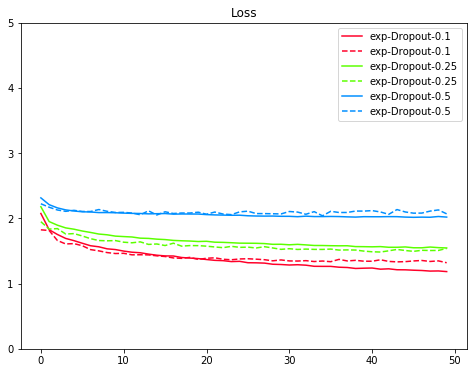

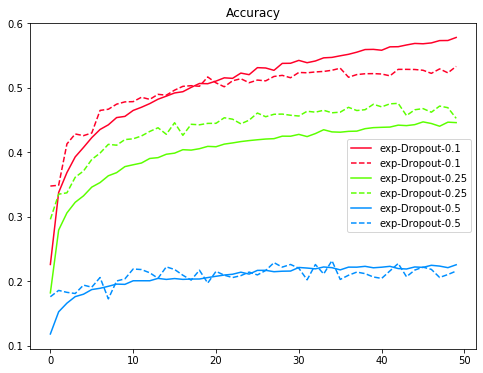

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()